In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

np.set_printoptions(precision=6)

In [5]:
class OpenQN:
    def __init__(self, L, k, lambda0, mu, Theta, omega):
        self.L = L
        self.k = k
        self.lambda0 = lambda0
        self.mu = mu
        self.Theta = Theta
        self.omega = omega
        
        self.list_lambda0 = []
        self.list_mu3 = []
        self.list_tau = []
        self.list_n = []
    
    def make_calculations(self, print_stat=False):
        self.get_stationary_vector()
        
        lambda_ = np.zeros(self.L)
        for i in range(1, len(self.omega)):
            lambda_[i - 1] = self.lambda0 * (self.omega[i] / self.omega[0])
        
        psy = np.zeros(self.L)
        for i in range(len(psy)):
            psy[i] = lambda_[i] / (self.k[i] * self.mu[i])
        
        P0 = [0] * self.L
        b = [0] * self.L
        h = [0] * self.L
        n = [0] * self.L
        u = [0] * self.L
        sum_for_tau = 0

        for i in range(len(P0)):
            summa = 0
            for j in range(self.k[i]):
                summa += (self.k[i] * psy[i])**j / factorial(j)
            P0[i] = ((((self.k[i] * psy[i])**self.k[i]) / 
                          (factorial(self.k[i]) * (1 - psy[i])) ) + summa)**(-1)
            b[i] = P0[i] * (((self.k[i]**self.k[i]) * (psy[i]**(self.k[i] + 1))) / 
                                (factorial(self.k[i]) * ((1 - psy[i])**2)))
            h[i] = psy[i] * self.k[i]
            n[i] = b[i] + h[i]
            u[i] = n[i] / lambda_[i]
            sum_for_tau += lambda_[i] * u[i]

        tau = (1 / self.lambda0) * sum_for_tau
        
        self.record(self.lambda0, self.mu[2], tau, n)
        
        if print_stat:
            print("lambda0:", self.lambda0)
            print("lambdas:", lambda_, "\n")
            print("psy:", psy, "\n")
            print("М.о. числа требований в сиситемах:\n", n)
            print("М.о. длительности пребывания требований в системах:", tau)
            print("\n", "#" * 100, "\n")

    def get_stationary_vector(self):
        while any(self.omega != self.omega.dot(self.Theta)):
            self.omega = self.omega.dot(self.Theta)
        return self.omega    
    
    def record(self, lambda0, mu3, tau, n):
        self.list_lambda0.append(lambda0)
        self.list_mu3.append(mu3)
        self.list_tau.append(tau)
        self.list_n.append(n)
        
    def show_for_lambda0(self):
        plt.plot(self.list_lambda0, self.list_tau)
        plt.title(f"Зависимость м.о. длительности пребывания от интенсивности входящего потока")
        plt.xlabel("lambda0")
        plt.ylabel("tau")
        plt.grid()
        plt.show()
        
        for i in range(self.L):
            plt.plot(self.list_lambda0, [n[i] for n in self.list_n], "g")
            plt.title(f"Зависимость м.о.числа требования в системе {i + 1} от интенсивности входящего потока")
            plt.xlabel("lambda0")
            plt.ylabel("n")
            plt.grid()
            plt.show()

    def show_for_mu3(self):
        plt.plot(self.list_mu3, self.list_tau)
        plt.title(f"Зависимость м.о. длительности пребывания от mu3")
        plt.xlabel("mu3")
        plt.ylabel("tau")
        plt.grid()
        plt.show()
        
        plt.plot(self.list_mu3, [n[2] for n in self.list_n], "g")
        plt.title(f"Зависимость м.о.числа требования в системе 3 от mu3")
        plt.xlabel("mu3")
        plt.ylabel("n")
        plt.grid()
        plt.show()
        
    def reset(self):
        self.list_lambda0.clear()
        self.list_mu3.clear()
        self.list_tau.clear()
        self.list_n.clear()
            
    def set_lambda0(self, l):
        self.lambda0 = l
        
    def set_mu3(self, mu):
        self.mu[2] = m
    


Стационарное решение:
omega: [0.119027 0.166247 0.102207 0.150852 0.056782 0.219516 0.087807 0.097563]
Check: 1.0000000000000038

 #################################################################################################### 

Изменяем lambda0:

lambda0: 0.15999999999999998
lambdas: [0.223475 0.13739  0.20278  0.076328 0.295082 0.118033 0.131148] 

psy: [0.148984 0.171738 0.20278  0.063607 0.295082 0.131148 0.145719] 

М.о. числа требований в сиситемах:
 [0.17506549545384495, 0.20734700340432266, 0.25435941304204773, 0.06792717086834732, 0.41860465116279055, 0.15094339622641506, 0.17057569296375263]
М.о. длительности пребывания требований в системах: 9.030142644509507

 #################################################################################################### 

lambda0: 0.22999999999999995
lambdas: [0.321246 0.197498 0.291497 0.109721 0.42418  0.169672 0.188525] 

psy: [0.214164 0.246873 0.291497 0.091434 0.42418  0.188525 0.209472] 

М.о. числа требований в сиситемах:

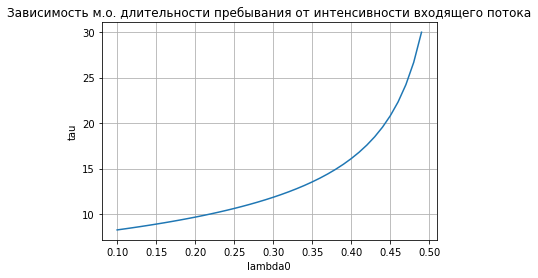

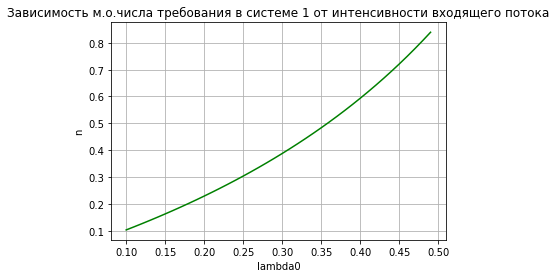

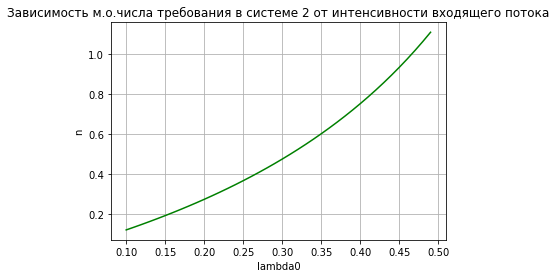

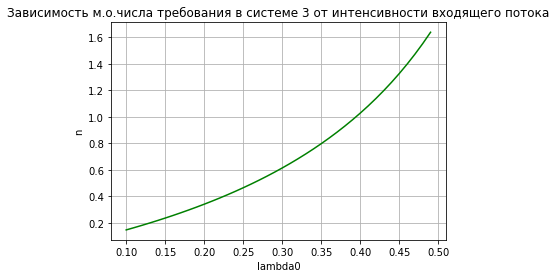

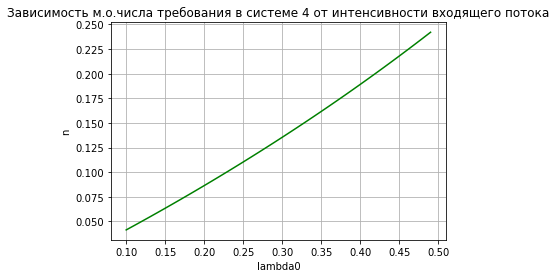

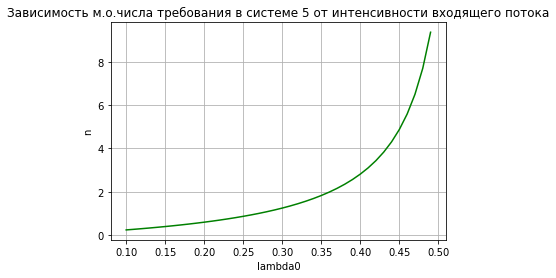

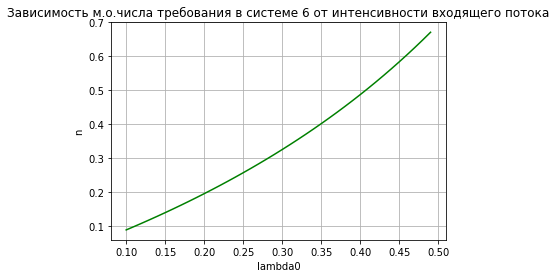

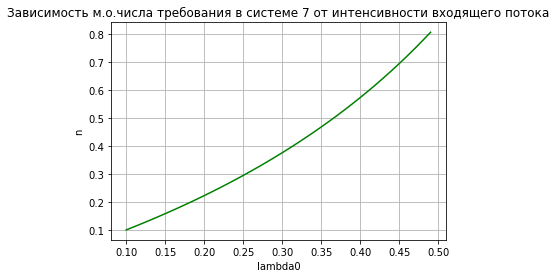

Изменяем mu3:

lambda0: 0.3
lambdas: [0.419016 0.257607 0.380213 0.143115 0.553279 0.221311 0.245902] 

psy: [0.279344 0.322008 0.44731  0.119262 0.553279 0.245902 0.273224] 

М.о. числа требований в сиситемах:
 [0.3876251137397634, 0.4749440851115275, 0.8093310534947824, 0.1354118194509074, 1.238532110091743, 0.3260869565217391, 0.37593984962406013]
М.о. длительности пребывания требований в системах: 12.492903293448412

 #################################################################################################### 

lambda0: 0.3
lambdas: [0.419016 0.257607 0.380213 0.143115 0.553279 0.221311 0.245902] 

psy: [0.279344 0.322008 0.30417  0.119262 0.553279 0.245902 0.273224] 

М.о. числа требований в сиситемах:
 [0.3876251137397634, 0.4749440851115275, 0.43713364871741667, 0.1354118194509074, 1.238532110091743, 0.3260869565217391, 0.37593984962406013]
М.о. длительности пребывания требований в системах: 11.252245277523858

 ###########################################################

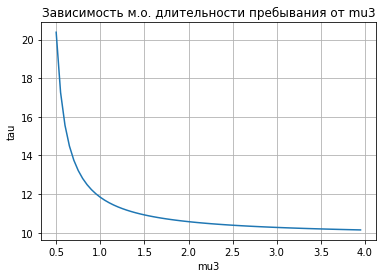

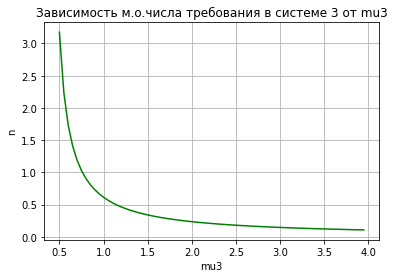

In [6]:
L = 7
lambda0 = 0.3
mu = np.array([1.5, 0.8, 1, 1.2, 1, 0.9, 0.9])
k = np.array([1, 1, 1, 1, 1, 1, 1])
# k = [3, 2, 4, 3, 1, 3, 2]
Theta = np.array([
    [.0, .7, .3, .0, .0, .0, .0, .0],
    [.0, .0, .4, .6, .0, .0, .0, .0],
    [.0, .0, .0, .5, .5, .0, .0, .0],
    [.0, .0, .0, .0, .0,  1, .0, .0],
    [.0, .0, .0, .0, .1, .9, .0, .0],
    [.0, .2, .0, .0, .0, .0, .4, .4],
    [.8, .0, .0, .0, .0, .2, .0, .0],
    [.5, .4, .0, .0, .0, .0, .0, .1]
])

omega = np.array([.1, .1, .1, .2, .1, .1, .1, .2])

qn = OpenQN(L, k, lambda0, mu, Theta, omega)
print("Стационарное решение:")
print("omega:", qn.get_stationary_vector())
print("Check:", sum(qn.get_stationary_vector()))
print("\n", "#" * 100, "\n")

lambdas0 = [x for x in np.arange(0.1, 0.5, 0.01)]
mu3 = [x for x in np.arange(0.5, 4, 0.05)]

print("Изменяем lambda0:\n")
i = 0
for l in lambdas0:
    i += 1
    qn.set_lambda0(l)
    qn.make_calculations(i % 7 == 0)

qn.show_for_lambda0()

qn.reset()

qn.set_lambda0(lambda0)

print("Изменяем mu3:\n")
i = 0
for m in mu3:
    i += 1
    qn.set_mu3(m)
    qn.make_calculations(i % 8 == 0)

qn.show_for_mu3()